# Projek Akhir Praktikum Kecerdasan Buatan
# Klasifikasi Kucing dan Kelinci
## A1-21 <br> Kelompok 8 :
 Al Fiana Nur Priyanti (2109106022) <br> <br>
 Shafira Octafia (2109106023)

## Import Library

In [ ]:
import os
import numpy as np
import pandas as pd
import splitfolders
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Collecting
Sumber Dataset : https://www.kaggle.com/datasets/muniryadi/cat-vs-rabbit

In [ ]:
base_dir = 'files/'
os.listdir(base_dir)

In [ ]:
# cat_dir = os.path.join(base_dir, 'Cat')
# rabbit_dir = os.path.join(base_dir, 'Rabbit')

# Data Preprocessing

In [ ]:
splitfolders.ratio(base_dir, output="Cat vs Rabbit", seed=1337, ratio=(0.7, 0.1, 0.2))

# dataset_train = os.path.join(base_dir, 'Train')
# dataset_val = os.path.join(base_dir, 'Val')
# dataset_test = os.path.join(base_dir, 'Test')

In [ ]:
# cat_train, cat_val = train_test_split(os.listdir(cat_dir), test_size=0.2)
# rabbit_train, rabbit_val = train_test_split(os.listdir(rabbit_dir), test_size=0.2)

In [ ]:
# cat_train = os.path.join(dataset_train, 'Cat')
# rabbit_train = os.path.join(dataset_train, 'Rabbit')

# cat_val = os.path.join(dataset_val, 'Cat')
# rabbit_val = os.path.join(dataset_val, 'Rabbit')

In [138]:
dataset_train = image_dataset_from_directory(
    'Cat vs Rabbit/train',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = (80, 80),
    shuffle = True,
    seed = 47,
)

dataset_val = image_dataset_from_directory(
    'Cat vs Rabbit/val',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = (80, 80),
    shuffle = True,
    seed = 47,
)

dataset_test = image_dataset_from_directory(
    'Cat vs Rabbit/test',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = (80, 80),
    shuffle = True,
    seed = 47,
)

Found 1419 files belonging to 2 classes.
Found 202 files belonging to 2 classes.
Found 408 files belonging to 2 classes.


## Preview Image

In [139]:
class_names = dataset_train.class_names

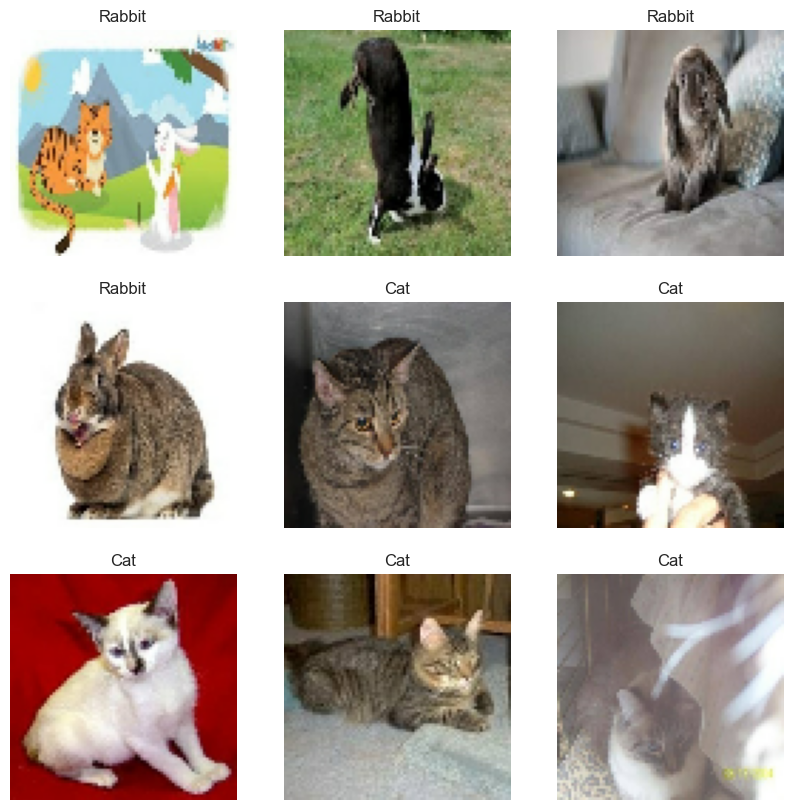

In [140]:
plt.figure(figsize=(10,10))

for images, labels in dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    img = images[0]

## Augmentasi Gambar

In [141]:
# def augment (x,y):
#     image = tf.image.random_hue (x,max_delta = 0.5, seed=42)
#     return image, y

train_dir = 'Cat vs Rabbit/train/'
val_dir = 'Cat vs Rabbit/val/'
test_dir = 'Cat vs Rabbit/test/'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = [0.5, 1.0],
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [142]:
# train = dataset_train.map(augment)

train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size = (80,80), # mengubah resolusi seluruh gambar jadi 80*80
    batch_size = 256, # menentukan jumlah gambar yang akan dimasukkan ke dalam steps training
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (80,80),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (80,80),
    batch_size = 32,
    class_mode = 'binary'
)



Found 1419 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


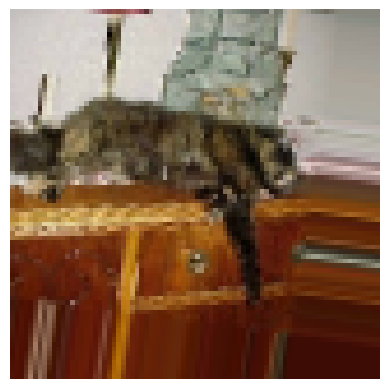

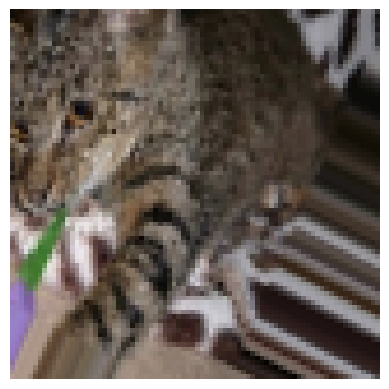

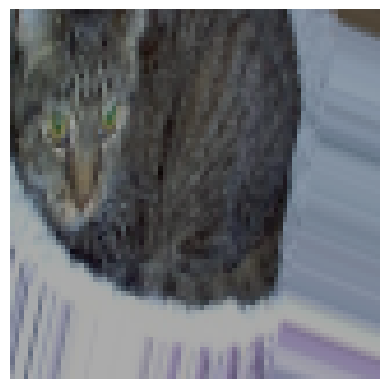

In [143]:
# def augmented (sebelum, sesudah):
#     plt.figure(figsize=(10,10))
#     plt.subplot(1, 2, 1)
#     plt.title("Sebelum Augmentasi")
#     plt.imshow(sebelum.numpy().astype("uint8"))
#     plt.subplot(1, 2, 2)
#     plt.title("Sesudah Augmentasi")
#     plt.imshow(sesudah.numpy().astype("uint8"))

# augmented(sebelum, tf.image.random_hue(sebelum,max_delta = 0.5, seed=42))

for _ in range(3):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

# Data Analisis dan Visualisasi

In [144]:
# Kelas dalam dataset
class_names

['Cat', 'Rabbit']

In [145]:
for images, labels in dataset_train.take(1):
    print(images.shape)
    print(labels.shape)

(32, 80, 80, 3)
(32,)


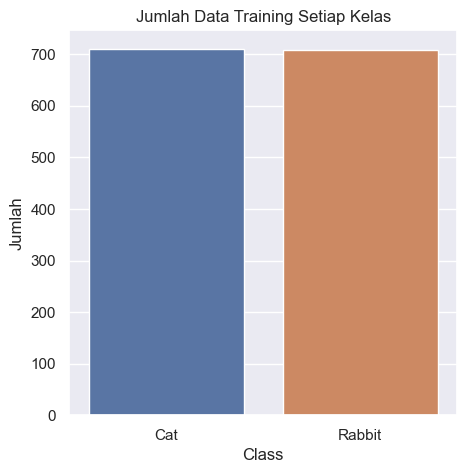

In [146]:
train_temp = dataset_train.unbatch()
train_labels = []
for x, y in train_temp:
    index = y
    train_labels.append(class_names[index])

plt.figure(figsize=(5, 5))
sns.set_theme()
sns.countplot(x=train_labels)
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Training Setiap Kelas')
plt.show()

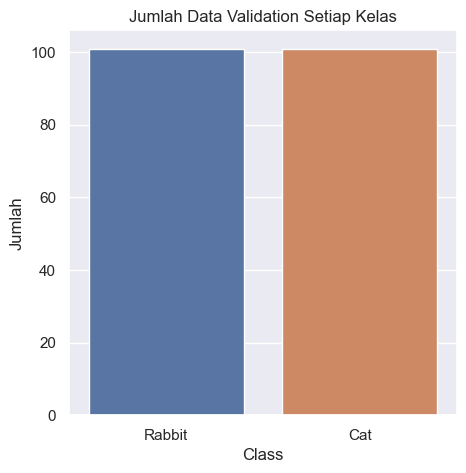

In [147]:
val_temp = dataset_val.unbatch()
val_labels = []
for x, y in val_temp:
    index = y
    val_labels.append(class_names[index])
    
plt.figure(figsize=(5, 5))
sns.set_theme()
sns.countplot(x=val_labels)
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Validation Setiap Kelas')
plt.show()

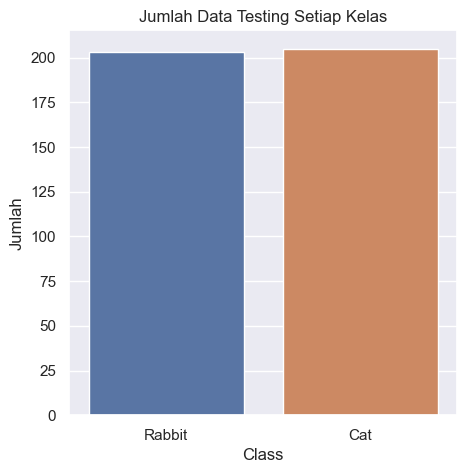

In [148]:
test_temp = dataset_test.unbatch()
test_labels = []
for x, y in test_temp:
    index = y
    test_labels.append(class_names[index])
    
plt.figure(figsize=(5, 5))
sns.set_theme()
sns.countplot(x=test_labels)
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Testing Setiap Kelas')
plt.show()

# Modeling

In [149]:
model = keras.Sequential(
    [
        Conv2D(256, (3,3), activation='relu', input_shape = [80, 80, 3]),
        MaxPooling2D(2, 2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')

        # # Input
        # layers.Input((80,80,3)),

        # # Hidden Layer
        # layers.Conv2D(16,3),
        # layers.Conv2D(32,3),
        # layers.MaxPool2D(),
        # layers.Flatten(),

        # # Output Layer
        # layers.Dense(2) 
    ]
)

In [150]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 39, 39, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 18, 18, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 8, 8, 64)       

In [151]:
# CALLBACK
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print("\nAkurasi telah mencapai > 95%!")
      self.model.stop_training = True
cb = myCallback()

In [152]:

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ["accuracy"]
)

In [163]:
# Fit Model
hasil = model.fit(
    train_generator, 
    epochs = 20, 
    # batch_size = 64,
    callbacks = cb,
    validation_data = val_generator,
    verbose = 1
    )

Epoch 1/20
6/6 [==============================] - 217s 38s/step - loss: 0.4124 - accuracy: 0.8118 - val_loss: 0.4268 - val_accuracy: 0.7822
Epoch 2/20
6/6 [==============================] - 214s 39s/step - loss: 0.3999 - accuracy: 0.8231 - val_loss: 0.4339 - val_accuracy: 0.7871
Epoch 3/20
6/6 [==============================] - 245s 40s/step - loss: 0.4024 - accuracy: 0.8118 - val_loss: 0.3757 - val_accuracy: 0.8119
Epoch 4/20
6/6 [==============================] - 240s 45s/step - loss: 0.3891 - accuracy: 0.8161 - val_loss: 0.3371 - val_accuracy: 0.8564
Epoch 5/20
6/6 [==============================] - 215s 36s/step - loss: 0.3955 - accuracy: 0.8076 - val_loss: 0.3330 - val_accuracy: 0.8515
Epoch 6/20
6/6 [==============================] - 207s 30s/step - loss: 0.3947 - accuracy: 0.8217 - val_loss: 0.3927 - val_accuracy: 0.8218
Epoch 7/20
6/6 [==============================] - 124s 16s/step - loss: 0.3972 - accuracy: 0.8132 - val_loss: 0.3479 - val_accuracy: 0.8465
Epoch 8/20
6/6 [====

# Evaluasi

In [164]:
# Evaluasi loss dan akurasi
model.evaluate(dataset_train, verbose=1)

45/45 [==============================] - 65s 1s/step - loss: 182.6058 - accuracy: 0.5891


[182.6058349609375, 0.5891472697257996]

ValueError: All arrays must be of the same length

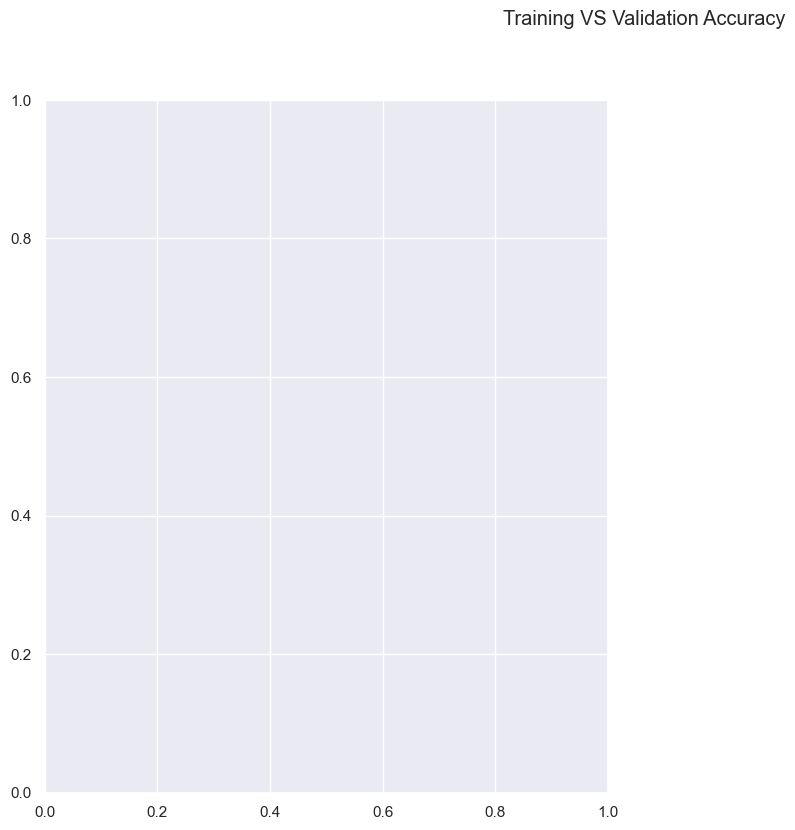

In [165]:
# Visualisasi hasil train dan val 

epoch = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(16,9))
plt.suptitle('Training VS Validation Accuracy')

# Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch, y=hasil.history['accuracy'], label='Akurasi Training')
sns.lineplot(x=epoch, y=hasil.history['val_accuracy'], label='Akurasi Validation')

plt.xticks(epoch)
plt.xlabel('N_Epoch')
plt.ylabel('Accuracy(%)')
plt.title('Akurasi Training/Validation')

# Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch, y=hasil.history['loss'], label='Loss Training')
sns.lineplot(x=epoch, y=hasil.history['val_loss'], label='Loss Validation')

plt.xticks(epoch)
plt.xlabel('N_Epoch')
plt.ylabel('Loss(%)')
plt.title('Loss Training/Validation')

plt.show()

## Prediksi

1/1 [==============================] - 0s 96ms/step


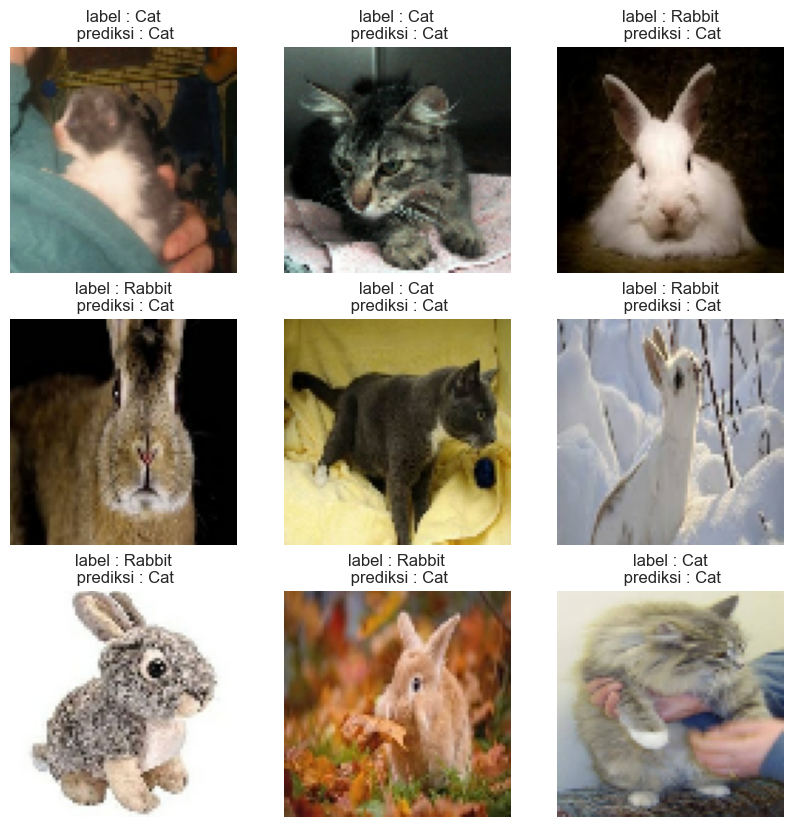

In [ ]:
image, label = next(iter(dataset_test))

plt.figure(figsize=(10,10))
for i in range(9):
        plt.subplot(3,3, i+1)
        y_pred = np.argmax(model.predict(image[i][None, ...]))
        plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")), cmap = 'Blues_r')
        plt.title(f'label : {class_names[labels[i]]}\n prediksi : {class_names[y_pred]}')
        plt.axis('off')